We demonstrate PCA and clustering on several datasets.
As in other labs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data


In [2]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage


## Principal Components Analysis
In this lab, we perform PCA on  `USArrests`, a data set in the
`R` computing environment.

In [3]:
USArrests = get_rdataset('USArrests').data
USArrests


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


The columns of the data set contain the four variables.

In [4]:
USArrests.columns


Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

We first briefly examine the data. We notice that the variables have vastly different means.

In [5]:
USArrests.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

We can also examine the
variance of the four variables using the `var()`  method.

In [7]:
USArrests.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [8]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)


Having scaled the data, we can then
perform principal components analysis using the `PCA()` transform
from the `sklearn.decomposition` package.

In [9]:
pcaUS = PCA()


(By default, the `PCA()`  transform centers the variables to have
mean zero though it does not scale them.) The transform `pcaUS`
can be used to find the PCA
`scores` returned by `fit()`. Once the `fit` method has been called, the `pcaUS` object also contains a number of useful quantities.

In [10]:
pcaUS.fit(USArrests_scaled)


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


After fitting, the `mean_` attribute corresponds to the means
of the variables. In this case, since we centered and scaled the data with
`scaler()` the means will all be 0.

In [11]:
pcaUS.mean_


array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

The scores can be computed using the `transform()` method
of `pcaUS` after it has been fit.

In [12]:
scores = pcaUS.transform(USArrests_scaled)


We will plot these scores a bit further down.
The `components_` attribute provides the principal component loadings:
each row of `pcaUS.components_` contains the corresponding
principal component loading vector.


In [13]:
pcaUS.components_ 


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

The `biplot`  is a common visualization method used with
PCA. It is not built in as a standard
part of `sklearn`, though there are python
packages that do produce such plots.

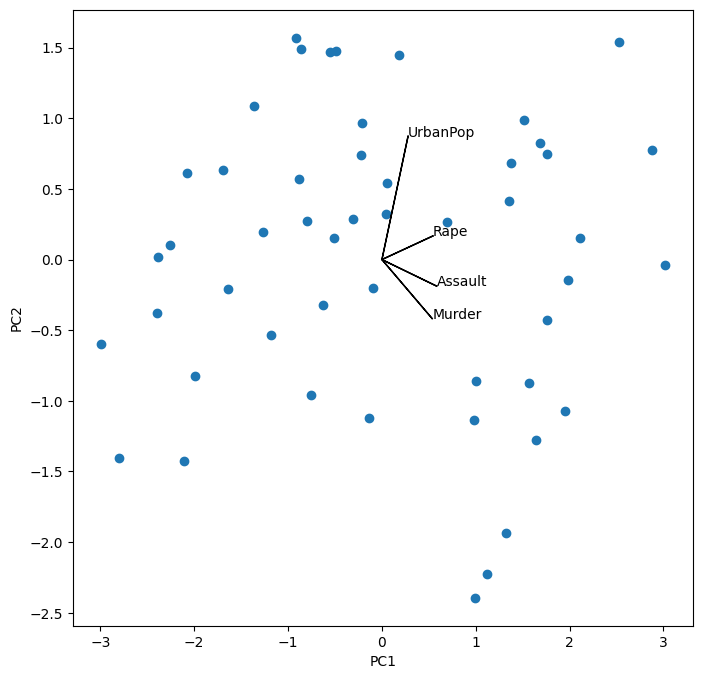

In [14]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k],
            pcaUS.components_[j,k],
            USArrests.columns[k])


Notice that this figure is a reflection of Figure~\ref{Ch10:fig:USArrests:obs} through the $y$-axis. Recall that the
principal components are only unique up to a sign change, so we can
reproduce that figure by flipping the
signs of the second set of scores and loadings.
We also increase the length of the arrows to emphasize the loadings.

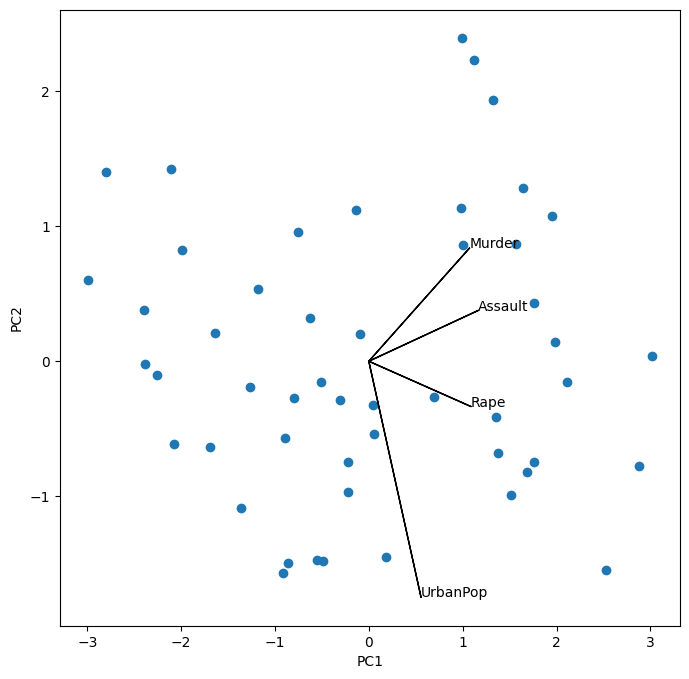

In [15]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k],
            s_*pcaUS.components_[j,k],
            USArrests.columns[k])


The standard deviations of the principal component scores are as follows:

In [16]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance of each score can be extracted directly from the `pcaUS` object via
the `explained_variance_` attribute.

In [17]:
pcaUS.explained_variance_


array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

The proportion of variance explained by each principal 
component (PVE) is stored as `explained_variance_ratio_`:

In [18]:
pcaUS.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the
variance in the data, the next principal component explains 24.7%
of the variance, and so forth.
We can plot the PVE explained by each component

In [19]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)


Notice the use of `%%capture`, which suppresses the displaying of the partially completed figure.

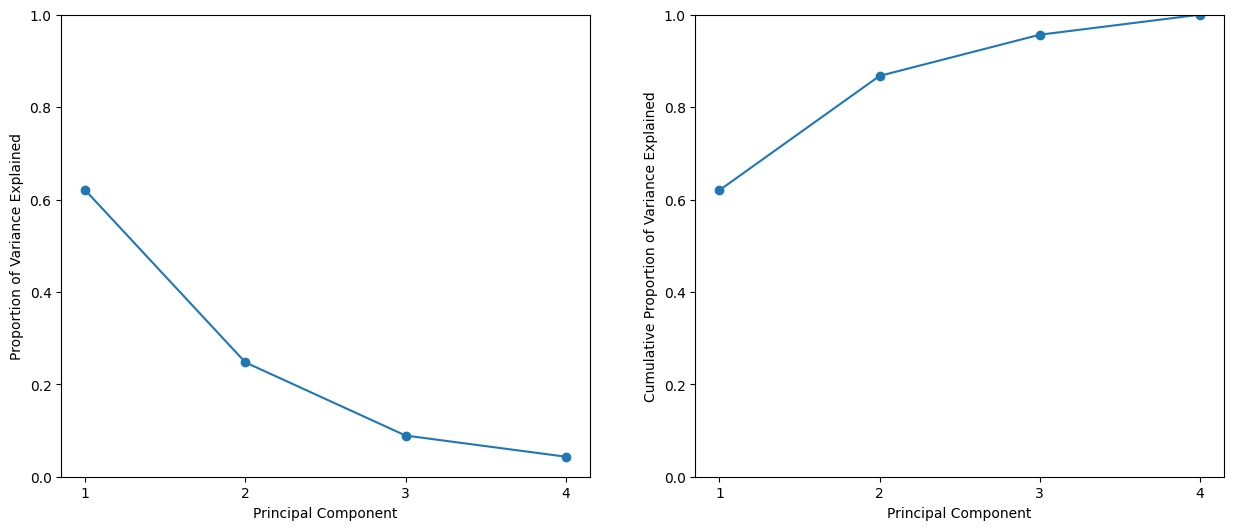

In [20]:
ax = axes[1]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig


In [21]:
a = np.array([1,2,8,-3])
np.cumsum(a)


array([ 1,  3, 11,  8])

## Matrix Completion

In [23]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape


((50, 4), (4,), (4, 4))

The `np.linalg.svd()` function returns three components, `U`, `D` and `V`. The matrix `V` is equivalent to the
loading matrix from principal components (up to an unimportant sign flip). Using the `full_matrices=False` option ensures that
for a tall matrix the shape of `U` is the same as the shape of `X`.

In [24]:
pcaUS.components_


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

The matrix `U` corresponds to a  *standardized* version of the PCA score matrix (each column standardized to have sum-of-squares one). If we multiply each column of `U` by the corresponding element  of `D`, we recover the PCA scores exactly (up to a meaningless sign flip).

In [25]:
(U * D[None,:])[:3]


array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [-1.76316354, -0.74595678,  0.05478082, -0.83465292]])

In [27]:
scores[:3]


array([[ 0.98556588,  1.13339238, -0.44426879, -0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333,  0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082,  0.83465292]])

While it would be possible to carry out this lab using the `PCA()` estimator,
here we use the `np.linalg.svd()` function in order to illustrate its use.
We now omit 20 entries in the $50\times 4$ data matrix at random. We do so
by first selecting 20 rows (states) at random, and then selecting one
of the four entries in each row at random. 

In [28]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]),
                         n_omit,
                         replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),
                         n_omit,
                         replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan


In [29]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])


To conduct Step 1 of the algorithm, we initialize `Xhat` 

In [30]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]


Before we begin Step 2, we set ourselves up to measure the progress of our
iterations:

In [31]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)



In Step 2(a) of Algorithm

In [32]:
while rel_err > thresh:
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))


Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08



Finally, we compute the correlation between the 20 imputed values
and the actual values:

In [33]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]


0.7113567434297362

## Clustering

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  We begin with a simple simulated example in which there
truly are two clusters in the data: the first 25 observations have a
mean shift relative to the next 25 observations.

In [34]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;


We now perform $K$-means clustering with $K=2$.

We specify `random_state` to make the results reproducible.  The cluster assignments of the 50 observations are contained in `kmeans.labels_`.

In [35]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

The $K$-means clustering perfectly separated the observations into two
clusters even though we did not supply any group information to
`KMeans()`. We can plot the data, with each observation
colored according to its cluster assignment.

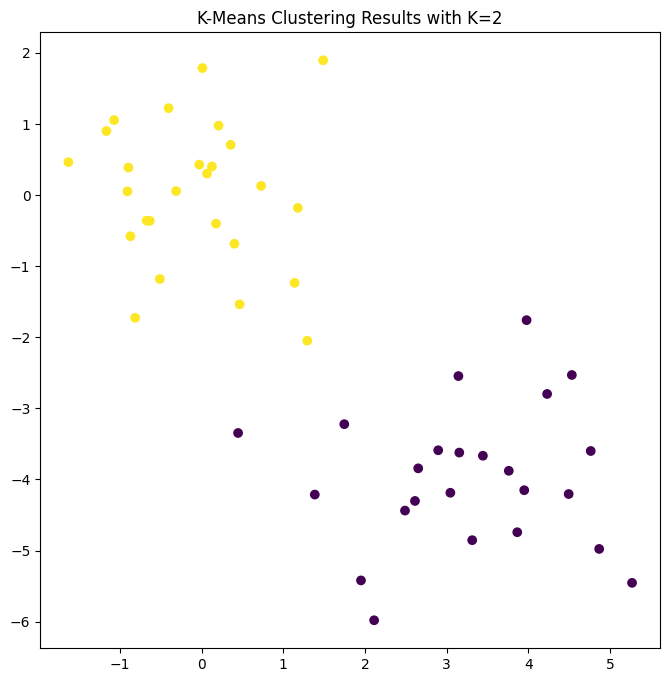

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");


Here the observations can be easily plotted because they are
two-dimensional. If there were more than two variables then we could
instead perform PCA and plot the first two principal component score
vectors to represent the clusters.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


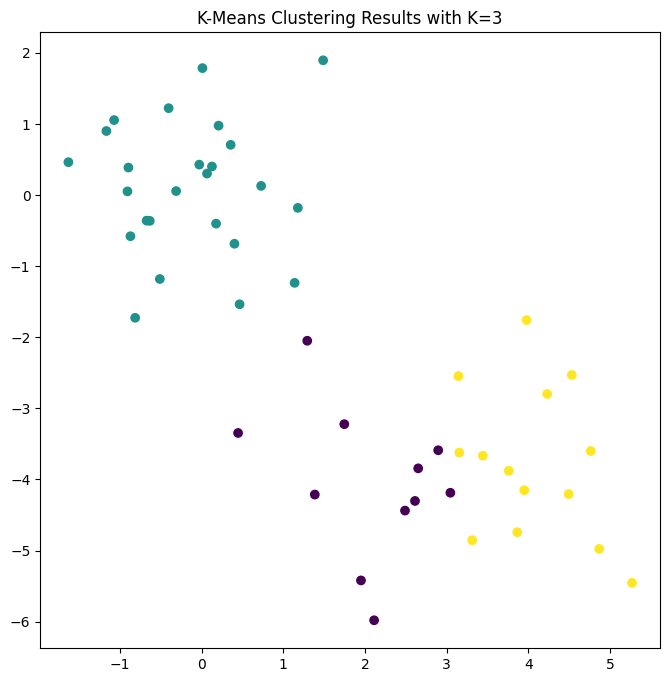

In [38]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");


When $K=3$, $K$-means clustering  splits up the two clusters.
We have used the `n_init` argument to run the $K$-means with 20 
initial cluster assignments (the default is 10).


In [40]:
kmeans1 = KMeans(n_clusters=3,
                random_state=3,
                n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(76.85131986999251, 75.06261242745384)

Note that `kmeans.inertia_` is the total within-cluster sum
of squares, which we seek to minimize by performing k-means
clustering 

We *strongly* recommend always running $K$-means clustering with
a large value of `n_init`, such as 20 or 50, since otherwise an
undesirable local optimum may be obtained.

When performing $K$-means clustering, in addition to using multiple
initial cluster assignments, it is also important to set a random seed
using the `random_state` argument to `KMeans()`. This way, the initial
cluster assignments in Step 1 can be replicated, and the $K$-means
output will be fully reproducible.

### Hierarchical Clustering

The `AgglomerativeClustering()`  class from
the `sklearn.clustering` package implements hierarchical clustering.

In [41]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)


,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,0
,compute_distances,False


This computes the entire dendrogram.
We could just as easily perform hierarchical clustering with average or single linkage instead:

In [42]:
hc_avg = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single');
hc_sing.fit(X);


To use a precomputed distance matrix, we provide an additional
argument `metric="precomputed"`. In the code below, the first four lines computes the $50\times 50$ pairwise-distance matrix.

In [43]:
D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    D[i] = np.sqrt(np.sum((X - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(D)


,n_clusters,None
,metric,'precomputed'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'single'
,distance_threshold,0
,compute_distances,False


We use
`dendrogram()` from `scipy.cluster.hierarchy` to plot the dendrogram. However,
`dendrogram()` expects a so-called *linkage-matrix representation*
of the clustering, which is not provided by `AgglomerativeClustering()`,
but can be computed. The function `compute_linkage()` in the
`ISLP.cluster` package is provided for this purpose.

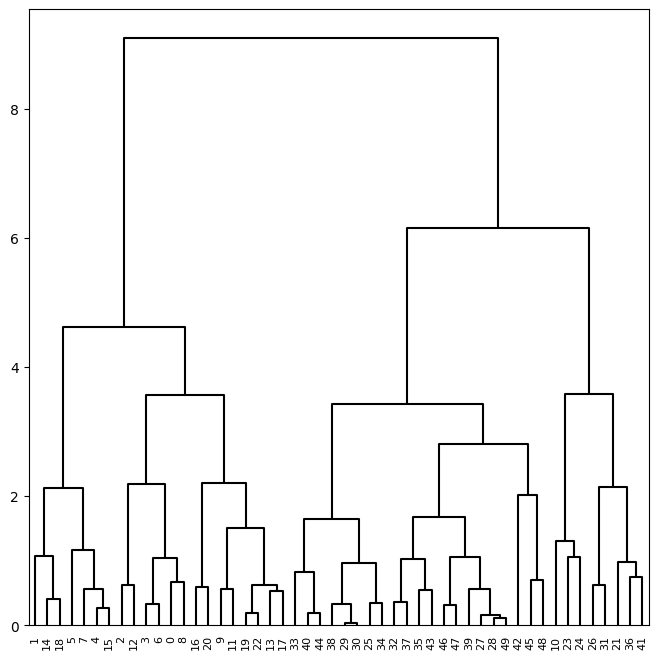

In [45]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);


We may want to color branches of the tree above
and below a cut-threshold differently. This can be achieved
by changing the `color_threshold`. Let’s cut the tree at a height of 4,
coloring links that merge above 4 in black.

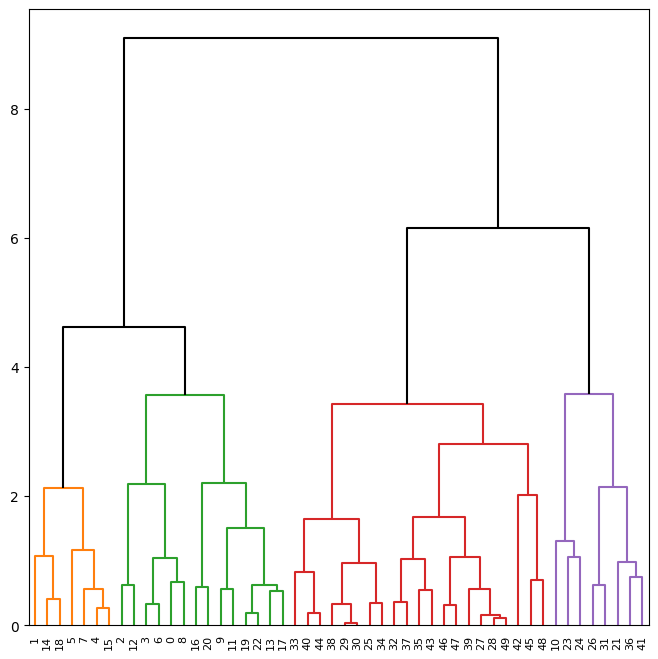

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');


To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` 
function from `scipy.cluster.hierarchy`:

In [47]:
cut_tree(linkage_comp, n_clusters=4).T


array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

This can also be achieved by providing an argument `n_clusters`
to `HClust()`; however each cut would require recomputing
the clustering. Similarly, trees may be cut by distance threshold
with an argument of `distance_threshold` to `HClust()`
or `height` to `cut_tree()`.

In [48]:
cut_tree(linkage_comp, height=5)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

To scale the variables before performing hierarchical clustering of
the observations, we use `StandardScaler()`  as in our PCA example:

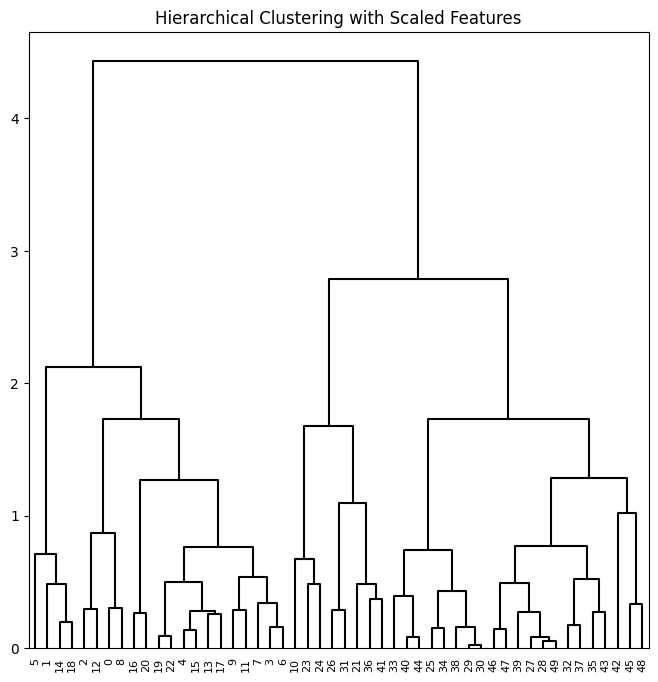

In [49]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");


Correlation-based distances between observations can be used for
clustering. The correlation between two observations measures the
similarity of their feature values. 
Note that using correlation only makes sense for
data with at least three features since the absolute correlation
between any two observations with measurements on two features is
always one. Hence, we will cluster a three-dimensional data set.

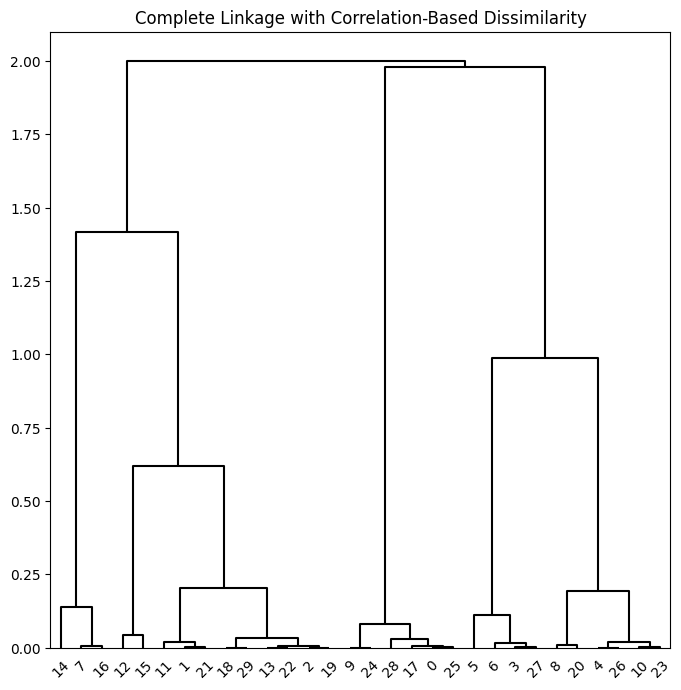

In [50]:
X = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor, ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity");


## NCI60 Data Example
Unsupervised techniques are often used in the analysis of genomic
data. In particular, PCA and hierarchical clustering are popular
tools.  We illustrate these techniques on the `NCI60`  cancer cell line
microarray data, which consists of 6830 gene expression
measurements on 64 cancer cell lines.

In [51]:
NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']


In [52]:
nci_data.shape


(64, 6830)

We begin by examining the cancer types for the cell lines.


In [53]:
nci_labs.value_counts()


label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: count, dtype: int64

### PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes)
to have standard deviation one, although here one could reasonably argue
that it is better not to scale the genes as they are measured in the same units.

In [54]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)


We now plot the first few principal component score vectors, in order
to visualize the data. The observations (cell lines) corresponding to
a given cancer type will be plotted in the same color, so that we can
see to what extent the observations within a cancer type are similar
to each other. 

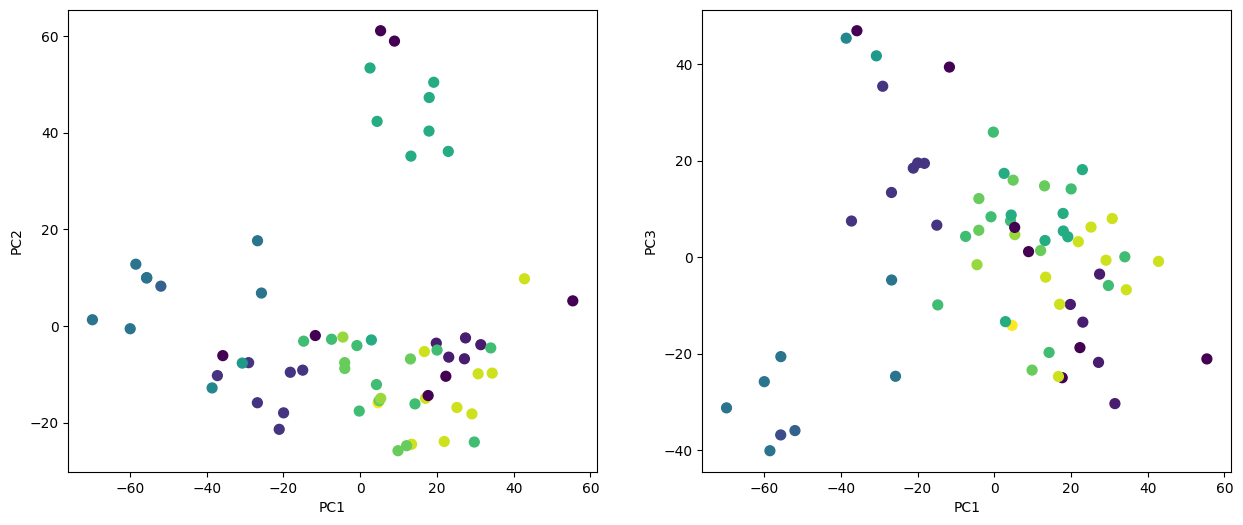

In [55]:
cancer_types = list(np.unique(nci_labs))
nci_groups = np.array([cancer_types.index(lab)
                       for lab in nci_labs.values])
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0],
           nci_scores[:,1],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0],
           nci_scores[:,2],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');


We can also plot the percent variance
explained by the principal components as well as the cumulative percent variance explained.
This is similar to the plots we made earlier for the `USArrests` data.

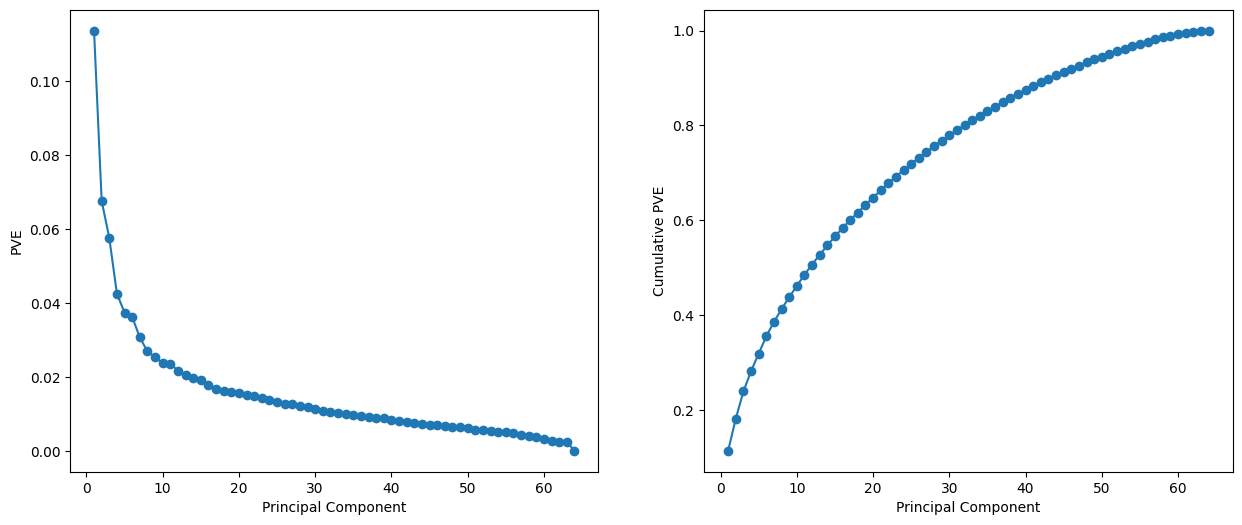

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks,
        nci_pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        nci_pca.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');


### Clustering the Observations of the NCI60 Data

We now perform hierarchical clustering of the cell lines in the `NCI60` data using
complete, single, and   average linkage. Once again, the goal is to find out whether or not the observations cluster into distinct types of cancer. Euclidean
distance is used as the dissimilarity measure. We first write a short
function to  produce
the three dendrograms.

In [58]:
def plot_nci(linkage, ax, cut=-np.inf):
    cargs = {'above_threshold_color':'black',
             'color_threshold':cut}
    hc = HClust(n_clusters=None,
                distance_threshold=0,
                linkage=linkage.lower()).fit(nci_scaled)
    linkage_ = compute_linkage(hc)
    dendrogram(linkage_,
               ax=ax,
               labels=np.asarray(nci_labs),
               leaf_font_size=10,
               **cargs)
    ax.set_title('%s Linkage' % linkage)
    return hc


Let’s  plot our results.

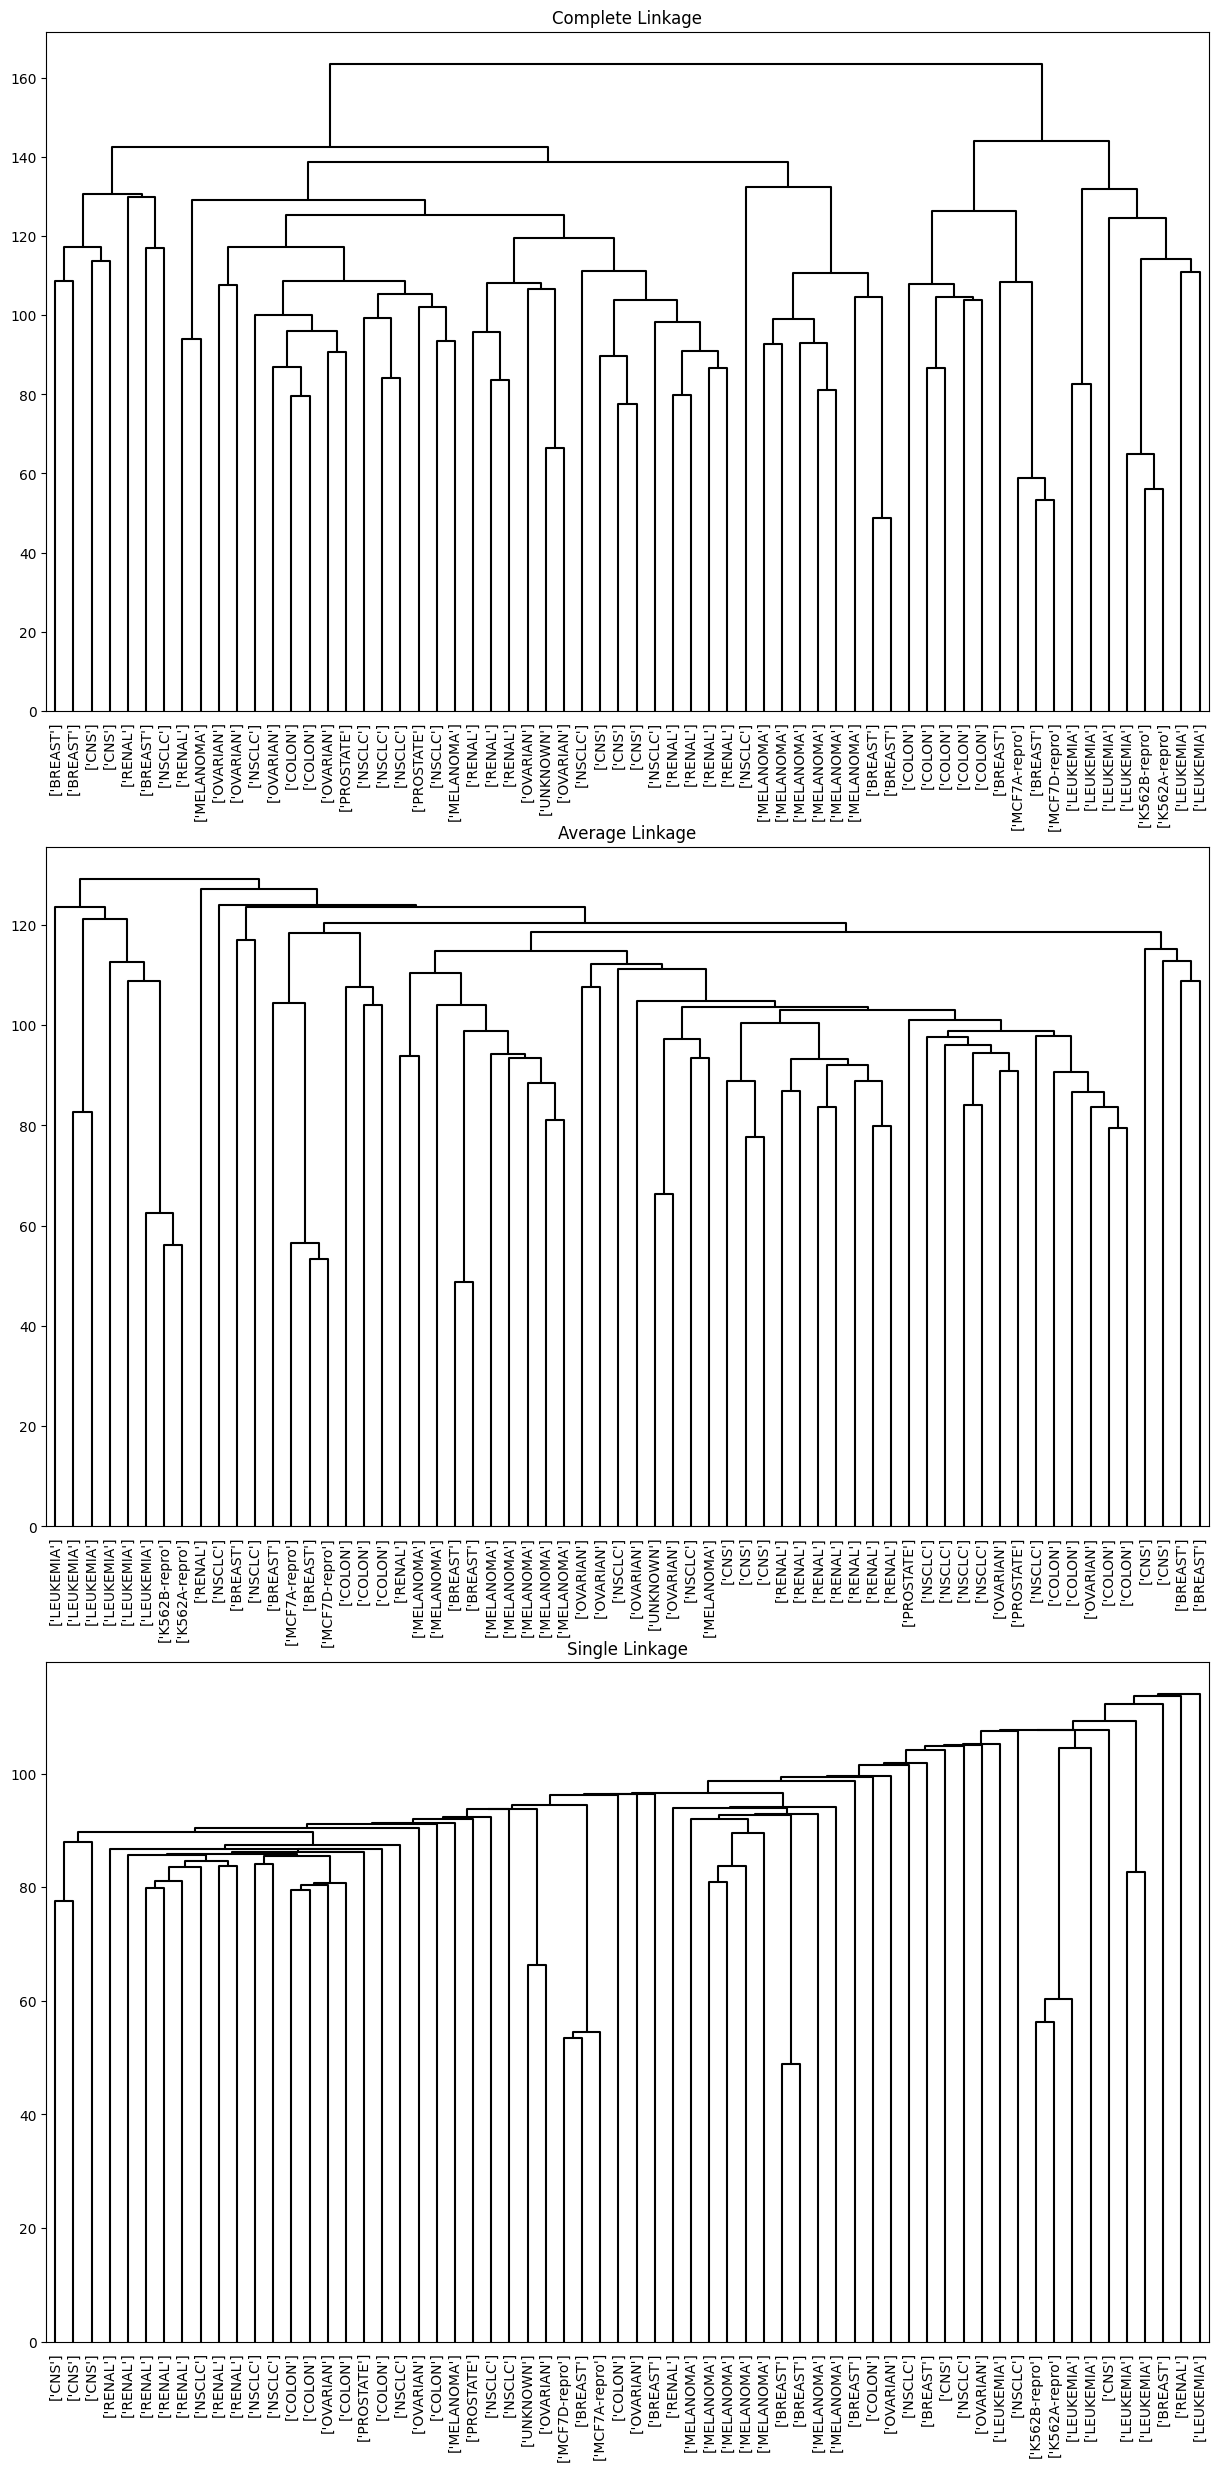

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(15,30))      
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)


We see that the
choice of linkage certainly does affect the results
obtained. Typically, single linkage will tend to yield *trailing*
clusters: very large clusters onto which individual observations
attach one-by-one. On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters. For this reason,
complete and average linkage are generally preferred to single
linkage.  Clearly cell lines within a single cancer type do tend to
cluster together, although the clustering is not perfect. We will use
complete linkage hierarchical clustering for the analysis that
follows.
 
We can cut the dendrogram at the height that will yield a particular
number of clusters, say four:

In [60]:
linkage_comp = compute_linkage(hc_comp)
comp_cut = cut_tree(linkage_comp, n_clusters=4).reshape(-1)
pd.crosstab(nci_labs['label'],
            pd.Series(comp_cut.reshape(-1), name='Complete'))


Complete,0,1,2,3
label,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


There are some clear patterns. All the leukemia cell lines fall in
one cluster, while the breast cancer cell lines are spread out over
three different clusters.

We can plot a cut on the dendrogram that produces these four clusters:

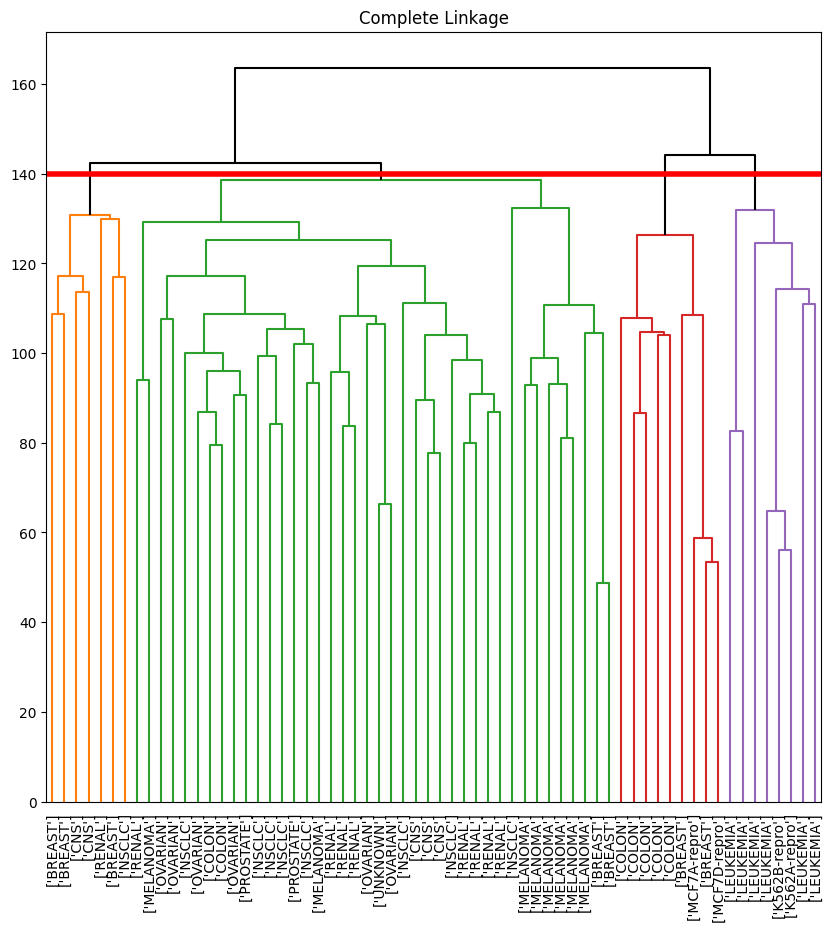

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
plot_nci('Complete', ax, cut=140)
ax.axhline(140, c='r', linewidth=4);


In [63]:
nci_kmeans = KMeans(n_clusters=4, 
                    random_state=0,
                    n_init=20).fit(nci_scaled)
pd.crosstab(pd.Series(comp_cut, name='HClust'),
            pd.Series(nci_kmeans.labels_, name='K-means'))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means,0,1,2,3
HClust,,,,
0,1,20,10,9
1,0,7,0,0
2,8,0,0,0
3,0,0,9,0


We see that the four clusters obtained using hierarchical clustering
and $K$-means clustering are somewhat different. First we note
that the labels in the two clusterings are arbitrary. That is, swapping
the identifier of the cluster does not
change the clustering. We see here Cluster 3 in
$K$-means clustering is identical to cluster 2 in hierarchical
clustering. However, the other clusters differ: for instance,
cluster 0 in $K$-means clustering contains a portion of the
observations assigned to cluster 0 by hierarchical clustering, as well
as all of the observations assigned to cluster 1 by hierarchical
clustering.


Complete-PCA,0,1,2,3
label,,,,
BREAST,0,5,0,2
CNS,2,3,0,0
COLON,7,0,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,2,0,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


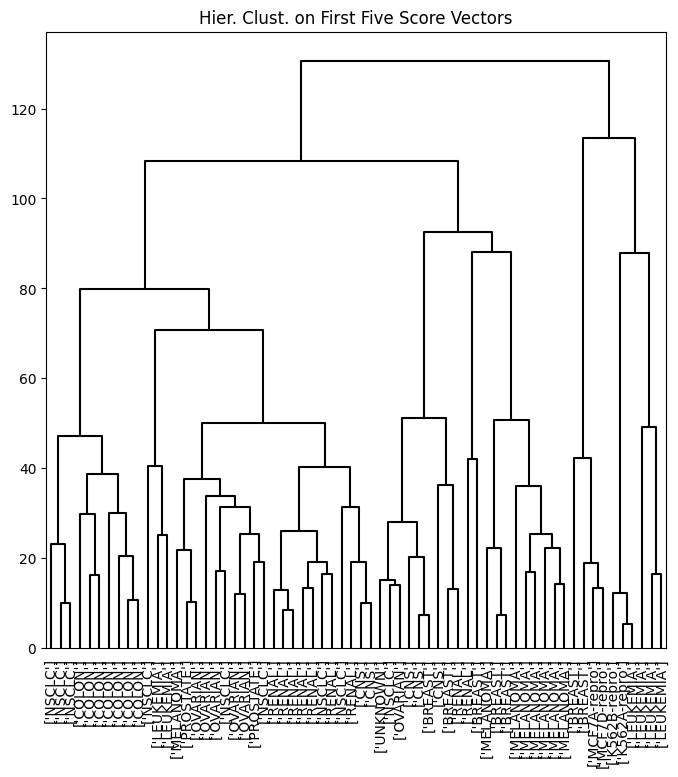

In [64]:
hc_pca = HClust(n_clusters=None,
                distance_threshold=0,
                linkage='complete'
                ).fit(nci_scores[:,:5])
linkage_pca = compute_linkage(hc_pca)
fig, ax = plt.subplots(figsize=(8,8))
dendrogram(linkage_pca,
           labels=np.asarray(nci_labs),
           leaf_font_size=10,
           ax=ax,
           **cargs)
ax.set_title("Hier. Clust. on First Five Score Vectors")
pca_labels = pd.Series(cut_tree(linkage_pca,
                                n_clusters=4).reshape(-1),
                       name='Complete-PCA')
pd.crosstab(nci_labs['label'], pca_labels)
